# Importing Libraries

In [1]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install scikit-plot

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.



     --------------------------------------- 14.7/14.7 MB 29.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns  # viz
from IPython.display import HTML, display
pd.set_option("display.max_columns",None)
import plotly.express as px
import os
import urllib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  mean_absolute_error,r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler # standardize characteristic data
from sklearn.model_selection import train_test_split # split the data into training and testing 
from collections import Counter

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Importing Dataset

The data is extracted from the website data.gov.uk website from the road-accidents-safety-data files available on
Importing url from the website and creating folder for using it, so that it can be retrieved directly from the folder.

In [5]:
import pandas as pd
import csv

data = pd.read_csv(r'G:\\ML\\OPTION1_uk_road_accident_2019_coursework_final.csv')
data.head(10)

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight
5,2019400862270,60,daylight,fine,dry,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,male and female,NaN,serious
6,2019420894599,30,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,40.0,fatal
7,2019010162791,50,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,57.0,slight
8,2019360909153,60,daylight,fine,dry,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,57.0,fatal
9,2019500856761,60,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,male and female,60.0,fatal


# Data Pre-processing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accident_index               31647 non-null  object 
 1   speed_limit                  31647 non-null  int64  
 2   light_conditions             31647 non-null  object 
 3   weather_conditions           31647 non-null  object 
 4   road_surface_conditions      31647 non-null  object 
 5   vehicle_type                 31647 non-null  object 
 6   junction_location            31647 non-null  object 
 7   skidding_and_overturning     31647 non-null  object 
 8   vehicle_leaving_carriageway  31647 non-null  object 
 9   hit_object_off_carriageway   31647 non-null  object 
 10  first_point_of_impact        31647 non-null  object 
 11  sex_of_driver                31647 non-null  object 
 12  age_of_oldest_driver         25197 non-null  float64
 13  accident_severit

Checking null values present in the dataframe

In [7]:
categorical_columns = ['accident_index','speed_limit', 'light_conditions', 'weather_conditions', 'road_surface_conditions','vehicle_type',
       'junction_location','skidding_and_overturning','vehicle_leaving_carriageway','hit_object_off_carriageway',
       'first_point_of_impact','sex_of_driver','age_of_oldest_driver','accident_severity']
data = data[categorical_columns]

data.isnull().sum()

accident_index                    0
speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver           6450
accident_severity              1172
dtype: int64

get a detailed view about the columns with null values

In [8]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum() 

age_of_oldest_driver    6450
accident_severity       1172
dtype: int64

Dropping null values present in dataframe

In [9]:
data = data.dropna()

data.isnull().sum() 

accident_index                 0
speed_limit                    0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
vehicle_type                   0
junction_location              0
skidding_and_overturning       0
vehicle_leaving_carriageway    0
hit_object_off_carriageway     0
first_point_of_impact          0
sex_of_driver                  0
age_of_oldest_driver           0
accident_severity              0
dtype: int64

# Checking for negative values in dataframe

In [10]:
data = data[data.select_dtypes(include=[np.number]).ge(0).all(1)]

Getting unique values in the dataframe

In [11]:
data["accident_index"].unique()
data["speed_limit"].unique()
data["light_conditions"].unique()
data["weather_conditions"].unique()
data["road_surface_conditions"].unique()
data["vehicle_type"].unique()
data["junction_location"].unique()
data["skidding_and_overturning"].unique()
data["vehicle_leaving_carriageway"].unique()
data["hit_object_off_carriageway"].unique()
data["sex_of_driver"].unique()
data["age_of_oldest_driver"].unique()
data["accident_severity"].unique()
data["first_point_of_impact"].unique()


array(['2019010225080', '2019200908684', '2019051911581', ...,
       '20191369p0654', '2019470903814', '2019010214285'], dtype=object)

array([30, 50, 60, 20, 40, 70], dtype=int64)

array(['darkness', 'daylight'], dtype=object)

array(['other', 'fine', 'data missing or out of range', 'fog or mist'],
      dtype=object)

array(['wet or damp', 'dry', 'other', 'data missing or out of range',
       'flood over 3cm. deep'], dtype=object)

array(['at least one van', 'only cars', 'at least one biped', 'other',
       'biped and van', 'data missing or out of range'], dtype=object)

array(['at or within 20 metres of junction',
       'not at or within 20 metres of junction',
       'data missing or out of range'], dtype=object)

array(['no skidding or overturning',
       'at least one vehicle skidded or overturned',
       'data missing or out of range'], dtype=object)

array(['none leaving carriageway',
       'at least one vehicle leaving carriageway',
       'data missing or out of range'], dtype=object)

array(['none hit an object', 'at least one vehicle hit an object',
       'data missing or out of range'], dtype=object)

array(['all males', 'all females', 'male and female',
       'data missing or out of range'], dtype=object)

array([ 63.,  82.,  39.,  40.,  57.,  60.,  46.,  47.,  45.,  30.,  41.,
        53.,  26.,  34.,  28.,  18.,  56.,  50.,  22.,  61.,  44.,  36.,
        42.,  68.,  88.,  54.,  51.,  35.,  19.,  17.,  69.,  33.,  21.,
        31.,  24.,  32.,  62.,  49.,  65.,  38.,  27.,  64.,  48.,  67.,
        83.,  58.,  55.,  23.,  59.,  74.,  72.,  29.,  80.,  43.,  20.,
        66.,  75.,   6.,  11.,  52.,  37.,  76.,  25.,  71.,  78.,  70.,
        84.,  15.,  90.,  73.,  79.,  85.,  77.,  81.,  86.,  89.,  87.,
        94.,  93.,  91.,  13.,  92.,  16.,  95.,  99.,  98.,  12.,  14.,
        96., 101.,  97.,  10.])

array(['serious', 'fatal', 'slight', 'Serious', 'Slight', 'Fatal'],
      dtype=object)

array(['other points of impact',
       'at least one vehicle with frontal impact', 'no impact',
       'data missing or out of range'], dtype=object)

Although null values were removed, most of the categorical columns still contain values irrelevant values for prediction.

In [12]:
print("weather_conditions",":", (data["weather_conditions"].isin(['data missing or out of range','other'])).sum())
print("road_surface_conditions",":", (data["road_surface_conditions"].isin(['data missing or out of range','other'])).sum())
print("vehicle_type",":", (data["vehicle_type"].isin(['data missing or out of range','other'])).sum())
print("skidding_and_overturning",":", (data["skidding_and_overturning"].isin(['data missing or out of range'])).sum())
print("vehicle_leaving_carriageway",":", (data["vehicle_leaving_carriageway"].isin(['data missing or out of range'])).sum())
print("hit_object_off_carriageway",":", (data["hit_object_off_carriageway"].isin(['data missing or out of range'])).sum())
print("sex_of_driver",":", (data["sex_of_driver"].isin(['data missing or out of range'])).sum())

weather_conditions : 4686
road_surface_conditions : 432
vehicle_type : 287
skidding_and_overturning : 557
vehicle_leaving_carriageway : 537
hit_object_off_carriageway : 497
sex_of_driver : 600


dropping the coloumn records with meaningless data

In [13]:
#drop records with meaningless data
data=data[data["weather_conditions"]!='data missing or out of range']
data=data[data["weather_conditions"]!='other']
data=data[data["road_surface_conditions"]!='data missing or out of range']
data=data[data["road_surface_conditions"]!='other']
data=data[data["road_surface_conditions"]!='flood over 3cm. deep']
data=data[data["vehicle_type"]!='data missing or out of range']
data=data[data["vehicle_type"]!='other']
data=data[data["skidding_and_overturning"]!='data missing or out of range']
data=data[data["skidding_and_overturning"]!='other']
data=data[data["vehicle_leaving_carriageway"]!='data missing or out of range']
data=data[data["vehicle_leaving_carriageway"]!='other']
data=data[data["junction_location"]!='data missing or out of range']
data=data[data["hit_object_off_carriageway"]!='data missing or out of range']
data=data[data["hit_object_off_carriageway"]!='other']
data=data[data["sex_of_driver"]!='data missing or out of range']
data=data[data["sex_of_driver"]!='other']
data=data[data["first_point_of_impact"]!='data missing or out of range']

Matching differences in the capital letters

In [14]:
data['accident_severity'] = data['accident_severity'].replace('serious','Serious')
data['accident_severity'] = data['accident_severity'].replace('slight','Slight')
data['accident_severity'] = data['accident_severity'].replace('fatal','Fatal')

In [15]:
data["accident_index"].unique()
data["speed_limit"].unique()
data["light_conditions"].unique()
data["weather_conditions"].unique()
data["road_surface_conditions"].unique()
data["vehicle_type"].unique()
data["junction_location"].unique()
data["skidding_and_overturning"].unique()
data["vehicle_leaving_carriageway"].unique()
data["hit_object_off_carriageway"].unique()
data["sex_of_driver"].unique()
data["age_of_oldest_driver"].unique()
data["accident_severity"].unique()
data["first_point_of_impact"].unique()

array(['2019200908684', '2019051911581', '2019420894599', ...,
       '2019070317173', '20191369p0654', '2019470903814'], dtype=object)

array([30, 50, 60, 20, 40, 70], dtype=int64)

array(['darkness', 'daylight'], dtype=object)

array(['fine', 'fog or mist'], dtype=object)

array(['dry', 'wet or damp'], dtype=object)

array(['only cars', 'at least one van', 'at least one biped',
       'biped and van'], dtype=object)

array(['at or within 20 metres of junction',
       'not at or within 20 metres of junction'], dtype=object)

array(['no skidding or overturning',
       'at least one vehicle skidded or overturned'], dtype=object)

array(['at least one vehicle leaving carriageway',
       'none leaving carriageway'], dtype=object)

array(['at least one vehicle hit an object', 'none hit an object'],
      dtype=object)

array(['all males', 'all females', 'male and female'], dtype=object)

array([ 82.,  39.,  40.,  57.,  60.,  47.,  45.,  46.,  30.,  41.,  53.,
        26.,  34.,  28.,  56.,  50.,  22.,  44.,  42.,  18.,  68.,  54.,
        51.,  19.,  17.,  35.,  69.,  33.,  61.,  21.,  31.,  24.,  32.,
        65.,  38.,  49.,  27.,  64.,  48.,  83.,  58.,  55.,  23.,  36.,
        59.,  72.,  29.,  80.,  20.,  66.,  75.,  11.,  52.,  37.,  25.,
        43.,  71.,  74.,  67.,  62.,  78.,  63.,  84.,  76.,  70.,  15.,
        90.,  73.,  79.,  77.,  88.,  86.,  81.,  89.,  85.,  87.,  94.,
        93.,  91.,  13.,  92.,  16.,  98.,  12.,  95.,  96.,  14., 101.,
        97.,  10.])

array(['Fatal', 'Slight', 'Serious'], dtype=object)

array(['at least one vehicle with frontal impact',
       'other points of impact', 'no impact'], dtype=object)

Target variable classes distribution and visualization

Slight     7839
Serious    6413
Fatal      4151
Name: accident_severity, dtype: int64


<AxesSubplot:>

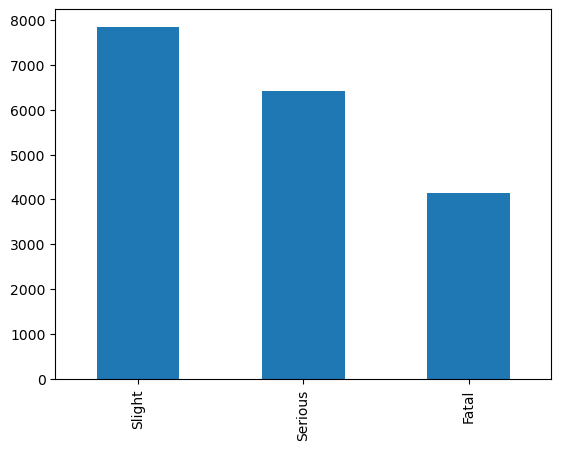

In [16]:
#target variable classes counts and bar plot
print(data['accident_severity'].value_counts())
data['accident_severity'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='speed_limit', ylabel='count'>

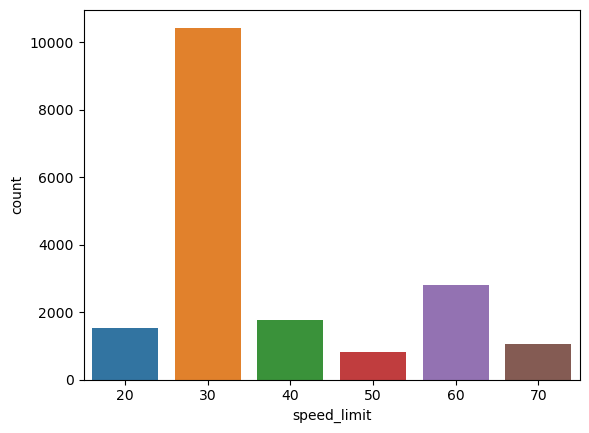

In [17]:
sb.countplot(x='speed_limit',data=data)
plt.show()

<AxesSubplot:xlabel='light_conditions', ylabel='count'>

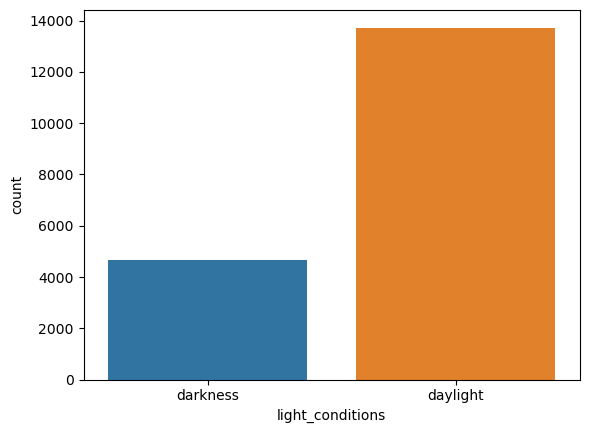

In [18]:
sb.countplot(x='light_conditions',data=data)
plt.show()

<AxesSubplot:xlabel='weather_conditions', ylabel='count'>

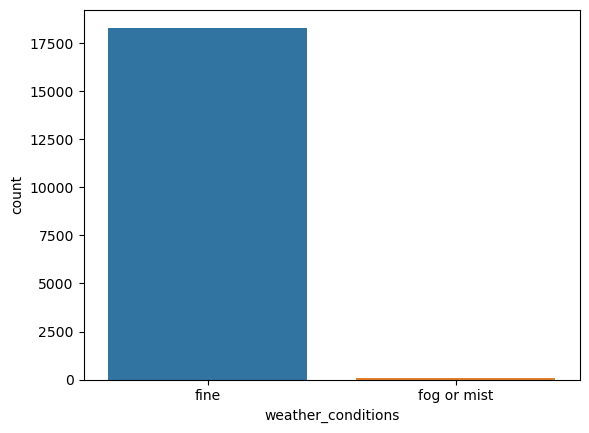

In [19]:
sb.countplot(x='weather_conditions',data=data)
plt.show()

<AxesSubplot:xlabel='road_surface_conditions', ylabel='count'>

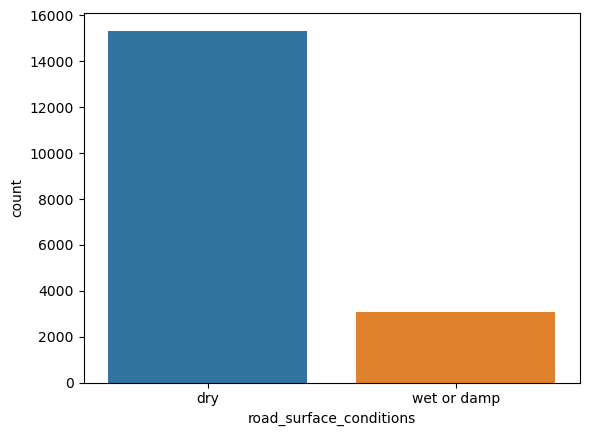

In [20]:
sb.countplot(x='road_surface_conditions',data=data)
plt.show()

<AxesSubplot:xlabel='junction_location', ylabel='count'>

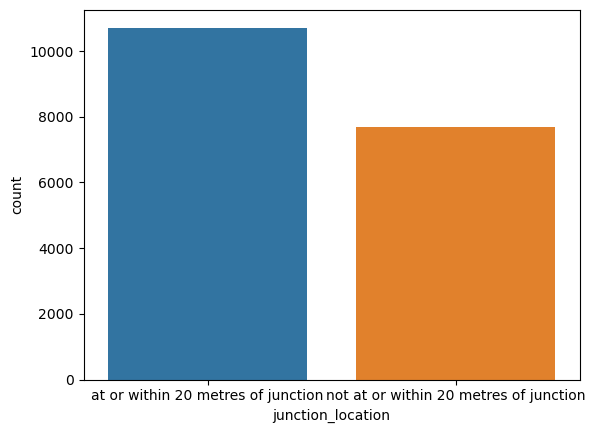

In [21]:
sb.countplot(x='junction_location',data=data)
plt.show()

<AxesSubplot:xlabel='skidding_and_overturning', ylabel='count'>

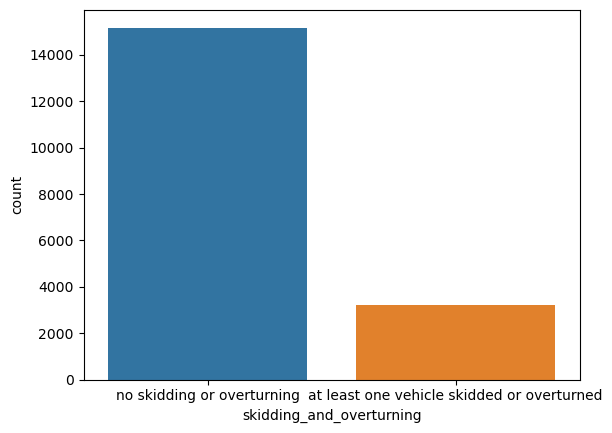

In [22]:
sb.countplot(x='skidding_and_overturning',data=data)
plt.show()

## sb.countplot(x='vehicle_leaving_carriageway',data=data)
plt.show()

<AxesSubplot:xlabel='hit_object_off_carriageway', ylabel='count'>

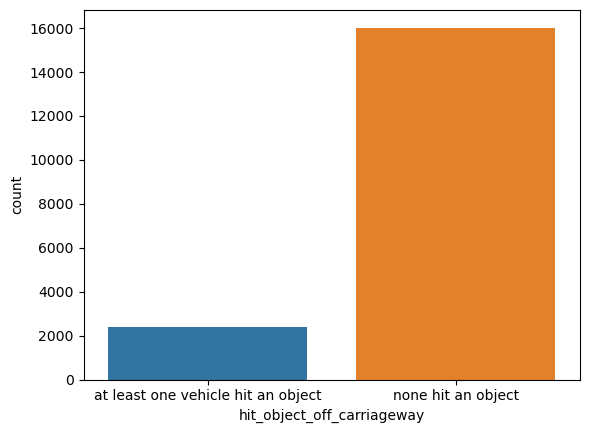

In [23]:
sb.countplot(x='hit_object_off_carriageway',data=data)
plt.show()


<AxesSubplot:xlabel='first_point_of_impact', ylabel='count'>

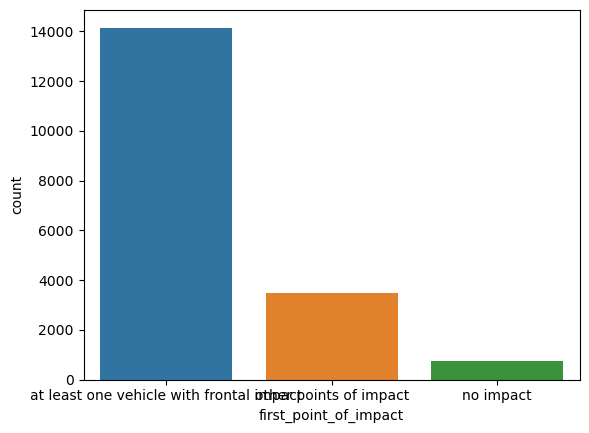

In [24]:
sb.countplot(x='first_point_of_impact',data=data)
plt.show()

<AxesSubplot:xlabel='sex_of_driver', ylabel='count'>

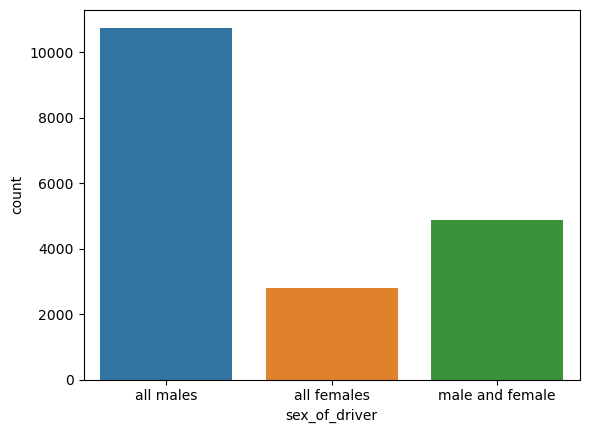

In [25]:
sb.countplot(x='sex_of_driver',data=data)
plt.show()

<AxesSubplot:xlabel='accident_severity', ylabel='count'>

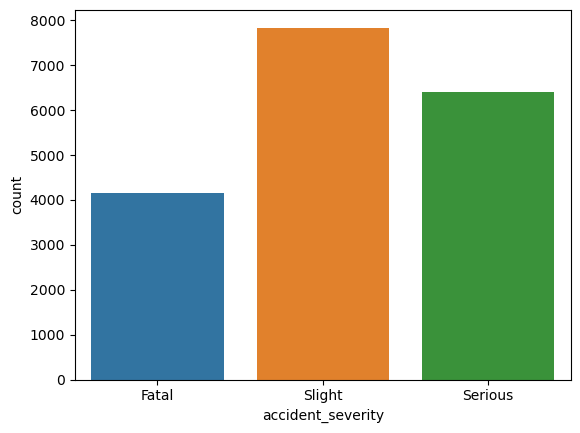

In [26]:
sb.countplot(x='accident_severity',data=data)
plt.show()

<AxesSubplot:xlabel='speed_limit'>

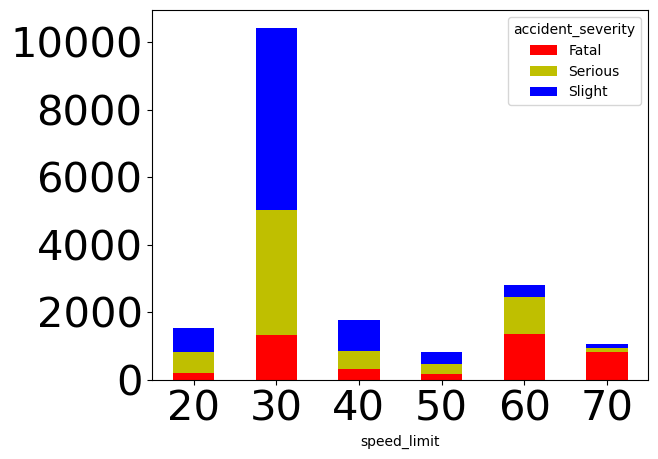

In [27]:
severity = pd.crosstab(data['speed_limit'], data['accident_severity'])
severity.plot(kind="bar", stacked=True, rot=0,color='r''y''b', fontsize=30)

In [28]:
severity1 = pd.DataFrame(data.groupby(['light_conditions','accident_severity']).size().reset_index())
severity1

,light_conditions,accident_severity,0
0,darkness,Fatal,2193
1,darkness,Serious,1748
2,darkness,Slight,732
3,daylight,Fatal,1958
4,daylight,Serious,4665
5,daylight,Slight,7107


<AxesSubplot:xlabel='light_conditions'>

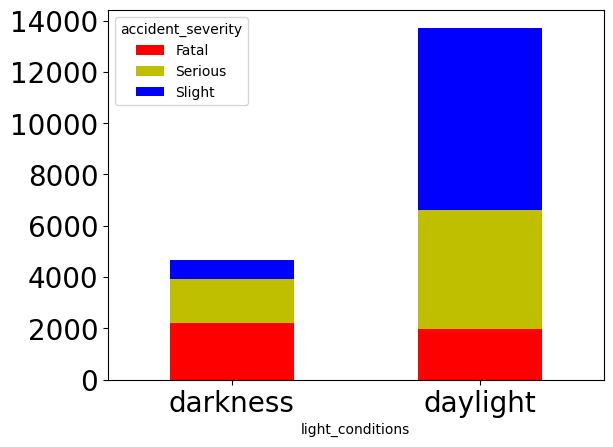

In [29]:
severity1_plot = pd.crosstab(data['light_conditions'], data['accident_severity'])
severity1_plot.plot(kind="bar", stacked=True, rot=0,color='r''y''b', fontsize=20)

In [30]:
severity2 = pd.DataFrame(data.groupby(['weather_conditions','accident_severity']).size().reset_index())
severity2

,weather_conditions,accident_severity,0
0,fine,Fatal,4104
1,fine,Serious,6389
2,fine,Slight,7823
3,fog or mist,Fatal,47
4,fog or mist,Serious,24
5,fog or mist,Slight,16


<AxesSubplot:xlabel='weather_conditions'>

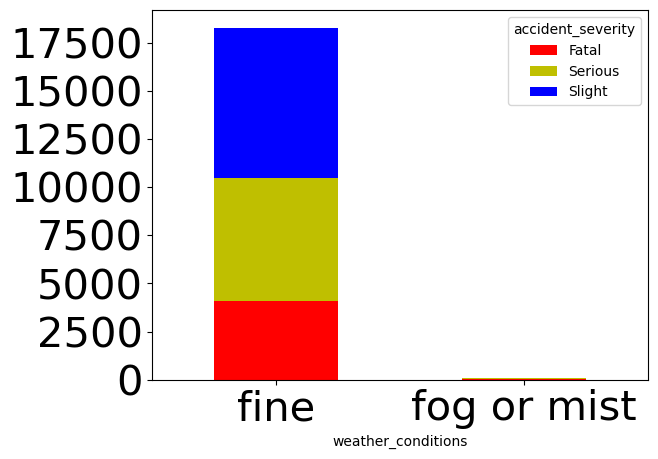

In [31]:

severity2_plot = pd.crosstab(data['weather_conditions'], data['accident_severity'])
severity2_plot.plot(kind="bar", stacked=True, rot=0,color='r''y''b', fontsize=30)

In [32]:
severity3 = pd.DataFrame(data.groupby(['road_surface_conditions','accident_severity']).size().reset_index())
severity3

,road_surface_conditions,accident_severity,0
0,dry,Fatal,3181
1,dry,Serious,5406
2,dry,Slight,6752
3,wet or damp,Fatal,970
4,wet or damp,Serious,1007
5,wet or damp,Slight,1087


<AxesSubplot:xlabel='road_surface_conditions'>

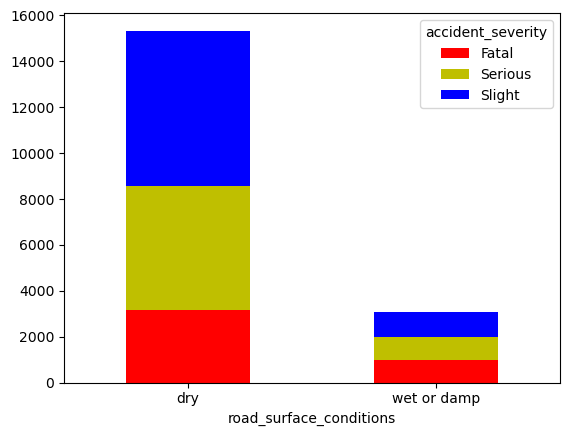

In [33]:
severity3_plot = pd.crosstab(data['road_surface_conditions'], data['accident_severity'])
severity3_plot.plot(kind="bar", stacked=True, rot=0,color='r''y''b')

In [34]:
severity4 = pd.DataFrame(data.groupby(['vehicle_type','accident_severity']).size().reset_index())
severity4

,vehicle_type,accident_severity,0
0,at least one biped,Fatal,185
1,at least one biped,Serious,4404
2,at least one biped,Slight,664
3,at least one van,Fatal,733
4,at least one van,Serious,356
5,at least one van,Slight,1379
6,biped and van,Fatal,433
7,biped and van,Serious,80
8,biped and van,Slight,91
9,only cars,Fatal,2800


<AxesSubplot:xlabel='vehicle_type'>

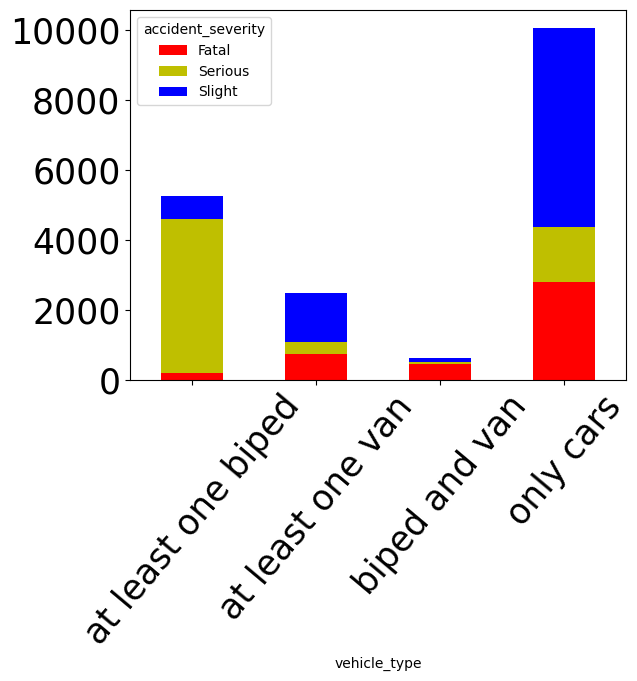

In [35]:
severity4_plot = pd.crosstab(data['vehicle_type'], data['accident_severity'])
severity4_plot.plot(kind="bar", stacked=True, rot=50,color='r''y''b', fontsize = 25)

In [36]:
severity5 = pd.DataFrame(data.groupby(['junction_location','accident_severity']).size().reset_index())
severity5

,junction_location,accident_severity,0
0,at or within 20 metres of junction,Fatal,1851
1,at or within 20 metres of junction,Serious,3980
2,at or within 20 metres of junction,Slight,4885
3,not at or within 20 metres of junction,Fatal,2300
4,not at or within 20 metres of junction,Serious,2433
5,not at or within 20 metres of junction,Slight,2954


<AxesSubplot:xlabel='junction_location'>

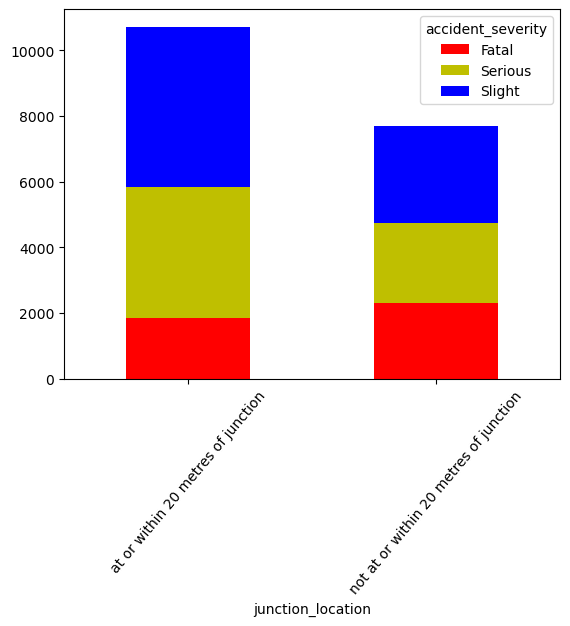

In [37]:
severity5_plot = pd.crosstab(data['junction_location'], data['accident_severity'])
severity5_plot.plot(kind="bar", stacked=True, rot=50,color='r''y''b')

In [38]:
severity6 = pd.DataFrame(data.groupby(['skidding_and_overturning','accident_severity']).size().reset_index())
severity6

,skidding_and_overturning,accident_severity,0
0,at least one vehicle skidded or overturned,Fatal,1114
1,at least one vehicle skidded or overturned,Serious,1331
2,at least one vehicle skidded or overturned,Slight,783
3,no skidding or overturning,Fatal,3037
4,no skidding or overturning,Serious,5082
5,no skidding or overturning,Slight,7056


<AxesSubplot:xlabel='skidding_and_overturning'>

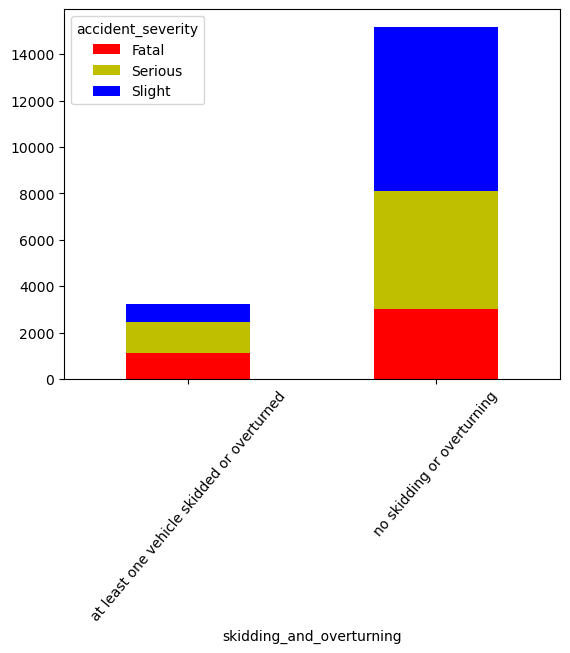

In [39]:
severity6_plot = pd.crosstab(data['skidding_and_overturning'], data['accident_severity'])
severity6_plot.plot(kind="bar", stacked=True, rot=50,color='r''y''b')

In [40]:
severity7 = pd.DataFrame(data.groupby(['vehicle_leaving_carriageway','accident_severity']).size().reset_index())
severity7

,vehicle_leaving_carriageway,accident_severity,0
0,at least one vehicle leaving carriageway,Fatal,1427
1,at least one vehicle leaving carriageway,Serious,1121
2,at least one vehicle leaving carriageway,Slight,1117
3,none leaving carriageway,Fatal,2724
4,none leaving carriageway,Serious,5292
5,none leaving carriageway,Slight,6722


<AxesSubplot:xlabel='vehicle_leaving_carriageway'>

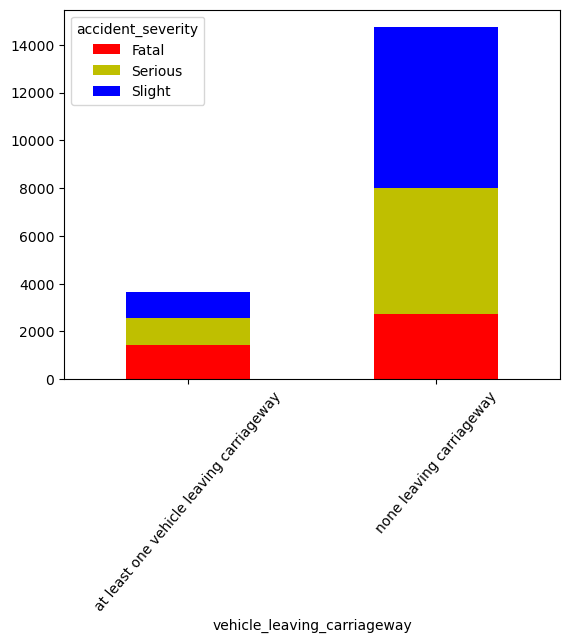

In [41]:
severity7_plot = pd.crosstab(data['vehicle_leaving_carriageway'], data['accident_severity'])
severity7_plot.plot(kind="bar", stacked=True, rot=50,color='r''y''b')

In [42]:
severity8 = pd.DataFrame(data.groupby(['hit_object_off_carriageway','accident_severity']).size().reset_index())
severity8

,hit_object_off_carriageway,accident_severity,0
0,at least one vehicle hit an object,Fatal,975
1,at least one vehicle hit an object,Serious,673
2,at least one vehicle hit an object,Slight,731
3,none hit an object,Fatal,3176
4,none hit an object,Serious,5740
5,none hit an object,Slight,7108


<AxesSubplot:xlabel='hit_object_off_carriageway'>

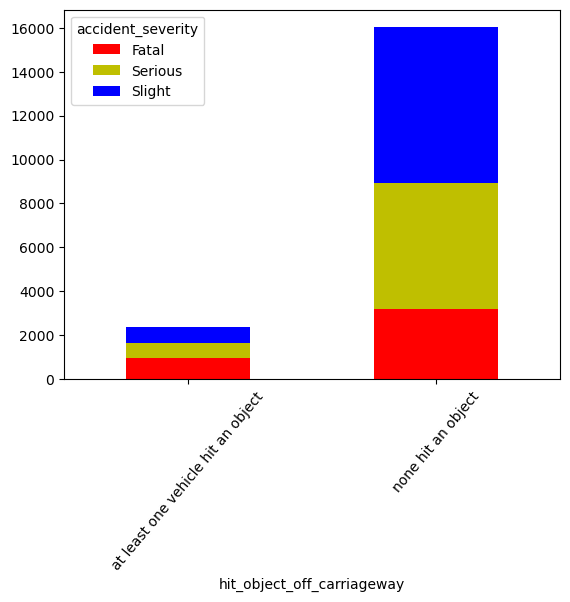

In [43]:
severity8_plot = pd.crosstab(data['hit_object_off_carriageway'], data['accident_severity'])
severity8_plot.plot(kind="bar", stacked=True, rot=50,color='r''y''b')

In [44]:
severity9 = pd.DataFrame(data.groupby(['first_point_of_impact','accident_severity']).size().reset_index())
severity9

,first_point_of_impact,accident_severity,0
0,at least one vehicle with frontal impact,Fatal,3234
1,at least one vehicle with frontal impact,Serious,4981
2,at least one vehicle with frontal impact,Slight,5934
3,no impact,Fatal,123
4,no impact,Serious,284
5,no impact,Slight,348
6,other points of impact,Fatal,794
7,other points of impact,Serious,1148
8,other points of impact,Slight,1557


<AxesSubplot:xlabel='first_point_of_impact'>

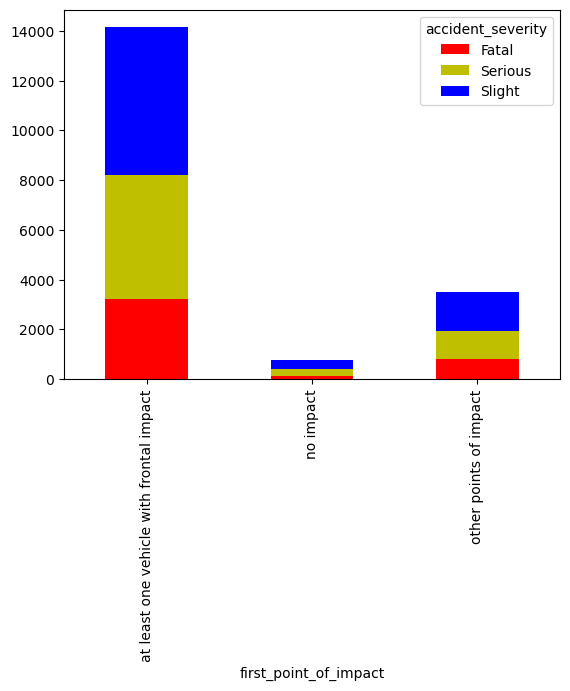

In [45]:
severity9_plot = pd.crosstab(data['first_point_of_impact'], data['accident_severity'])
severity9_plot.plot(kind="bar", stacked=True, rot=90,color='r''y''b')

In [46]:
severity10 = pd.DataFrame(data.groupby(['sex_of_driver','accident_severity']).size().reset_index())
severity10

,sex_of_driver,accident_severity,0
0,all females,Fatal,551
1,all females,Serious,585
2,all females,Slight,1655
3,all males,Fatal,2668
4,all males,Serious,4045
5,all males,Slight,4037
6,male and female,Fatal,932
7,male and female,Serious,1783
8,male and female,Slight,2147


<AxesSubplot:xlabel='sex_of_driver'>

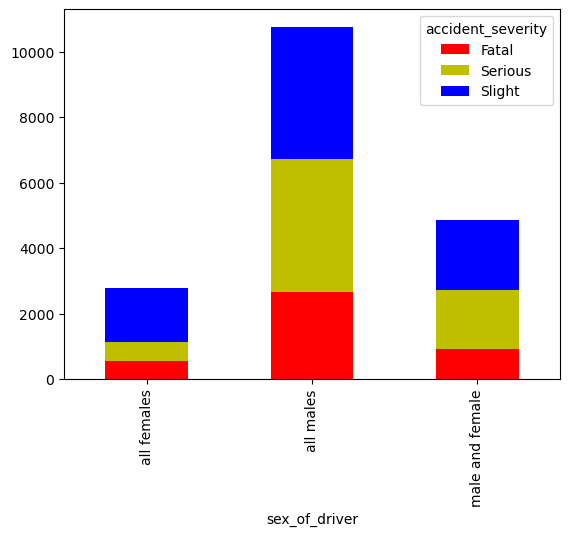

In [47]:
severity10_plot = pd.crosstab(data['sex_of_driver'], data['accident_severity'])
severity10_plot.plot(kind="bar", stacked=True, rot=90,color='r''y''b')

In [48]:
severity11 = pd.DataFrame(data.groupby(['age_of_oldest_driver','accident_severity']).size().reset_index())
severity11

,age_of_oldest_driver,accident_severity,0
0,10.0,Serious,1
1,11.0,Serious,1
2,11.0,Slight,1
3,12.0,Serious,2
4,12.0,Slight,1
5,13.0,Serious,3
6,14.0,Slight,1
7,15.0,Serious,4
8,15.0,Slight,2
9,16.0,Serious,19


<AxesSubplot:xlabel='age_of_oldest_driver'>

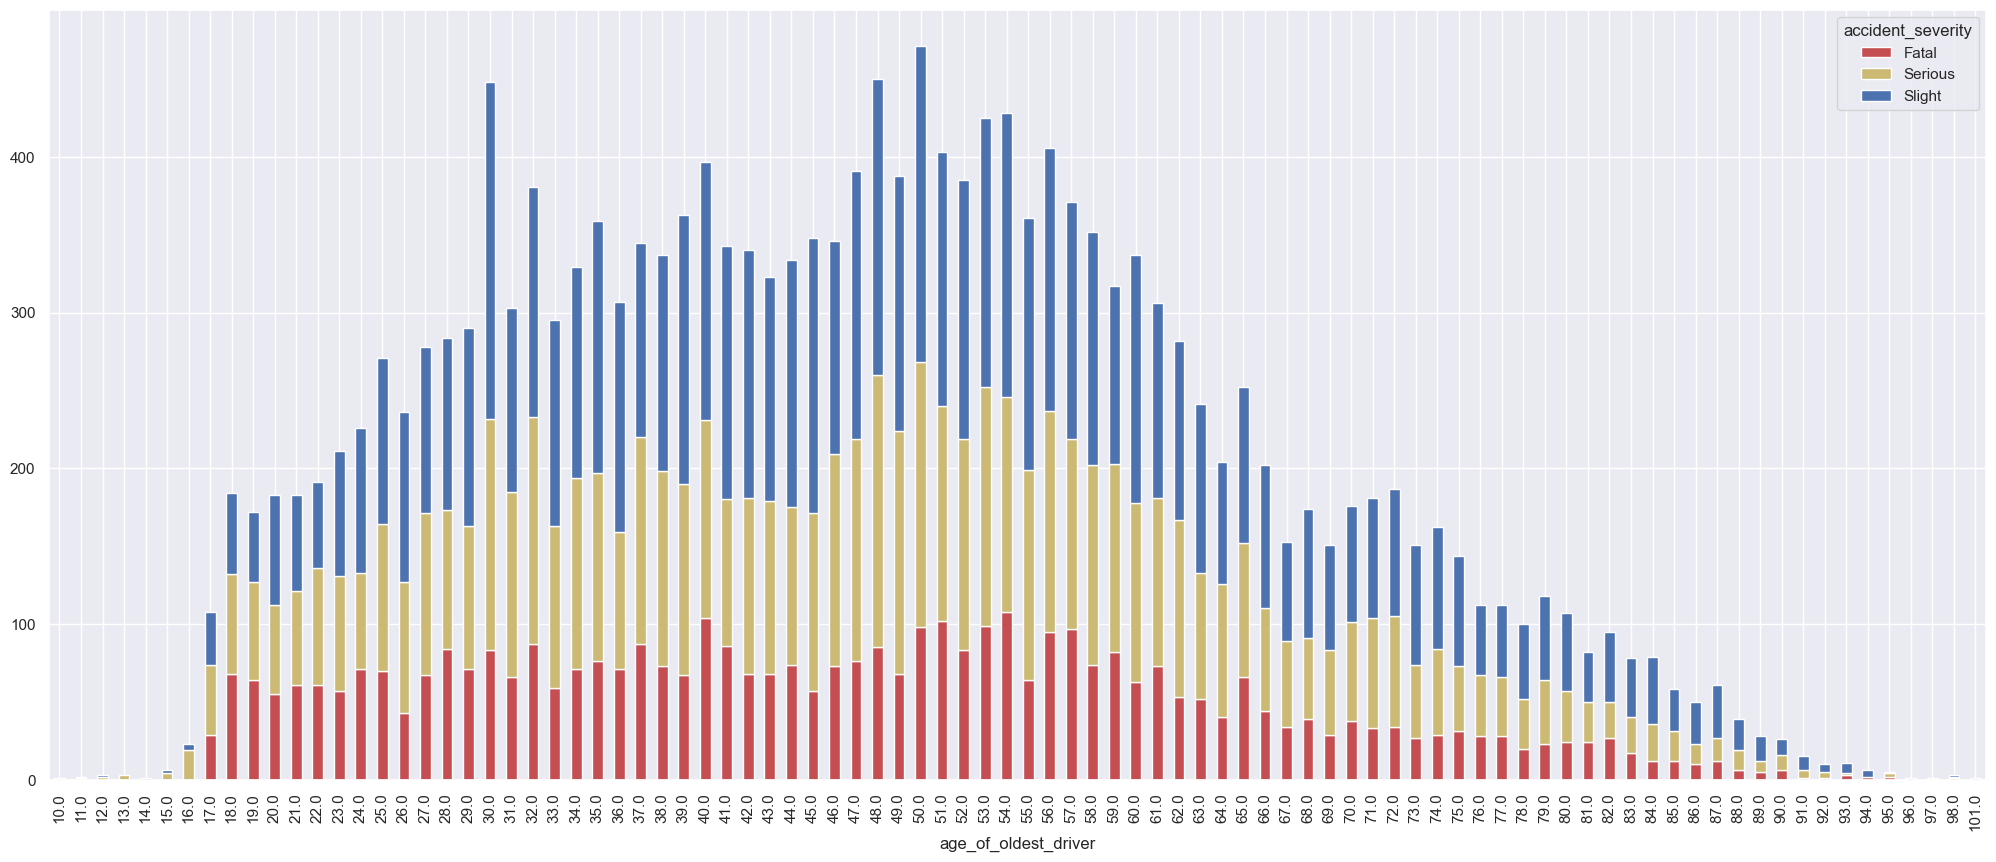

In [49]:
sns.set(rc={'figure.figsize':(25,10)})
severity10_plot = pd.crosstab(data['age_of_oldest_driver'], data['accident_severity'])
severity10_plot.plot(kind="bar", stacked=True, rot=90,color='r''y''b')

In [50]:
data.groupby(['speed_limit', 'road_surface_conditions'])[[
    'accident_severity'
]].count().reset_index().sort_values(by='speed_limit')

,speed_limit,road_surface_conditions,accident_severity
0,20,dry,1340
1,20,wet or damp,187
2,30,dry,8869
3,30,wet or damp,1572
4,40,dry,1448
5,40,wet or damp,322
6,50,dry,662
7,50,wet or damp,155
8,60,dry,2155
9,60,wet or damp,648


In [51]:
data.groupby(['speed_limit', 'vehicle_type'])[[
    'accident_severity'
]].count().reset_index().sort_values(by='speed_limit')

,speed_limit,vehicle_type,accident_severity
0,20,at least one biped,592
1,20,at least one van,215
2,20,biped and van,90
3,20,only cars,630
4,30,at least one biped,3268
5,30,at least one van,1194
6,30,biped and van,343
7,30,only cars,5636
10,40,biped and van,57
11,40,only cars,1017


Converting 'Object' to 'category' dtype - Saves memory

In [52]:

for col in set(data.columns) - set(data.describe().columns):
    data[col] = data[col].astype('category')

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18403 entries, 1 to 31645
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   accident_index               18403 non-null  category
 1   speed_limit                  18403 non-null  int64   
 2   light_conditions             18403 non-null  category
 3   weather_conditions           18403 non-null  category
 4   road_surface_conditions      18403 non-null  category
 5   vehicle_type                 18403 non-null  category
 6   junction_location            18403 non-null  category
 7   skidding_and_overturning     18403 non-null  category
 8   vehicle_leaving_carriageway  18403 non-null  category
 9   hit_object_off_carriageway   18403 non-null  category
 10  first_point_of_impact        18403 non-null  category
 11  sex_of_driver                18403 non-null  category
 12  age_of_oldest_driver         18403 non-null  float64 
 13  a

4.2 Look into the data pattern
first we will check the 'label'

# Dimensionality Reduction

In [54]:
data_new= data.drop(["accident_index","junction_location","weather_conditions"],axis=1, inplace= False)
data_new.head(3)

,speed_limit,light_conditions,road_surface_conditions,vehicle_type,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
1,30,darkness,dry,only cars,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,Fatal
4,30,daylight,dry,only cars,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,Slight
6,30,darkness,wet or damp,only cars,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,40.0,Fatal


In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_en=data_new.apply(le.fit_transform)
data_en.head()

,speed_limit,light_conditions,road_surface_conditions,vehicle_type,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
1,1,0,0,3,1,0,0,0,1,72,0
4,1,1,0,3,1,1,1,0,0,29,2
6,1,0,1,3,1,1,1,0,1,30,0
7,3,1,0,3,1,1,1,0,1,47,2
8,4,1,0,1,1,1,1,0,1,47,0


<AxesSubplot:>

Text(0.5, 1.0, 'Features correlation graph')

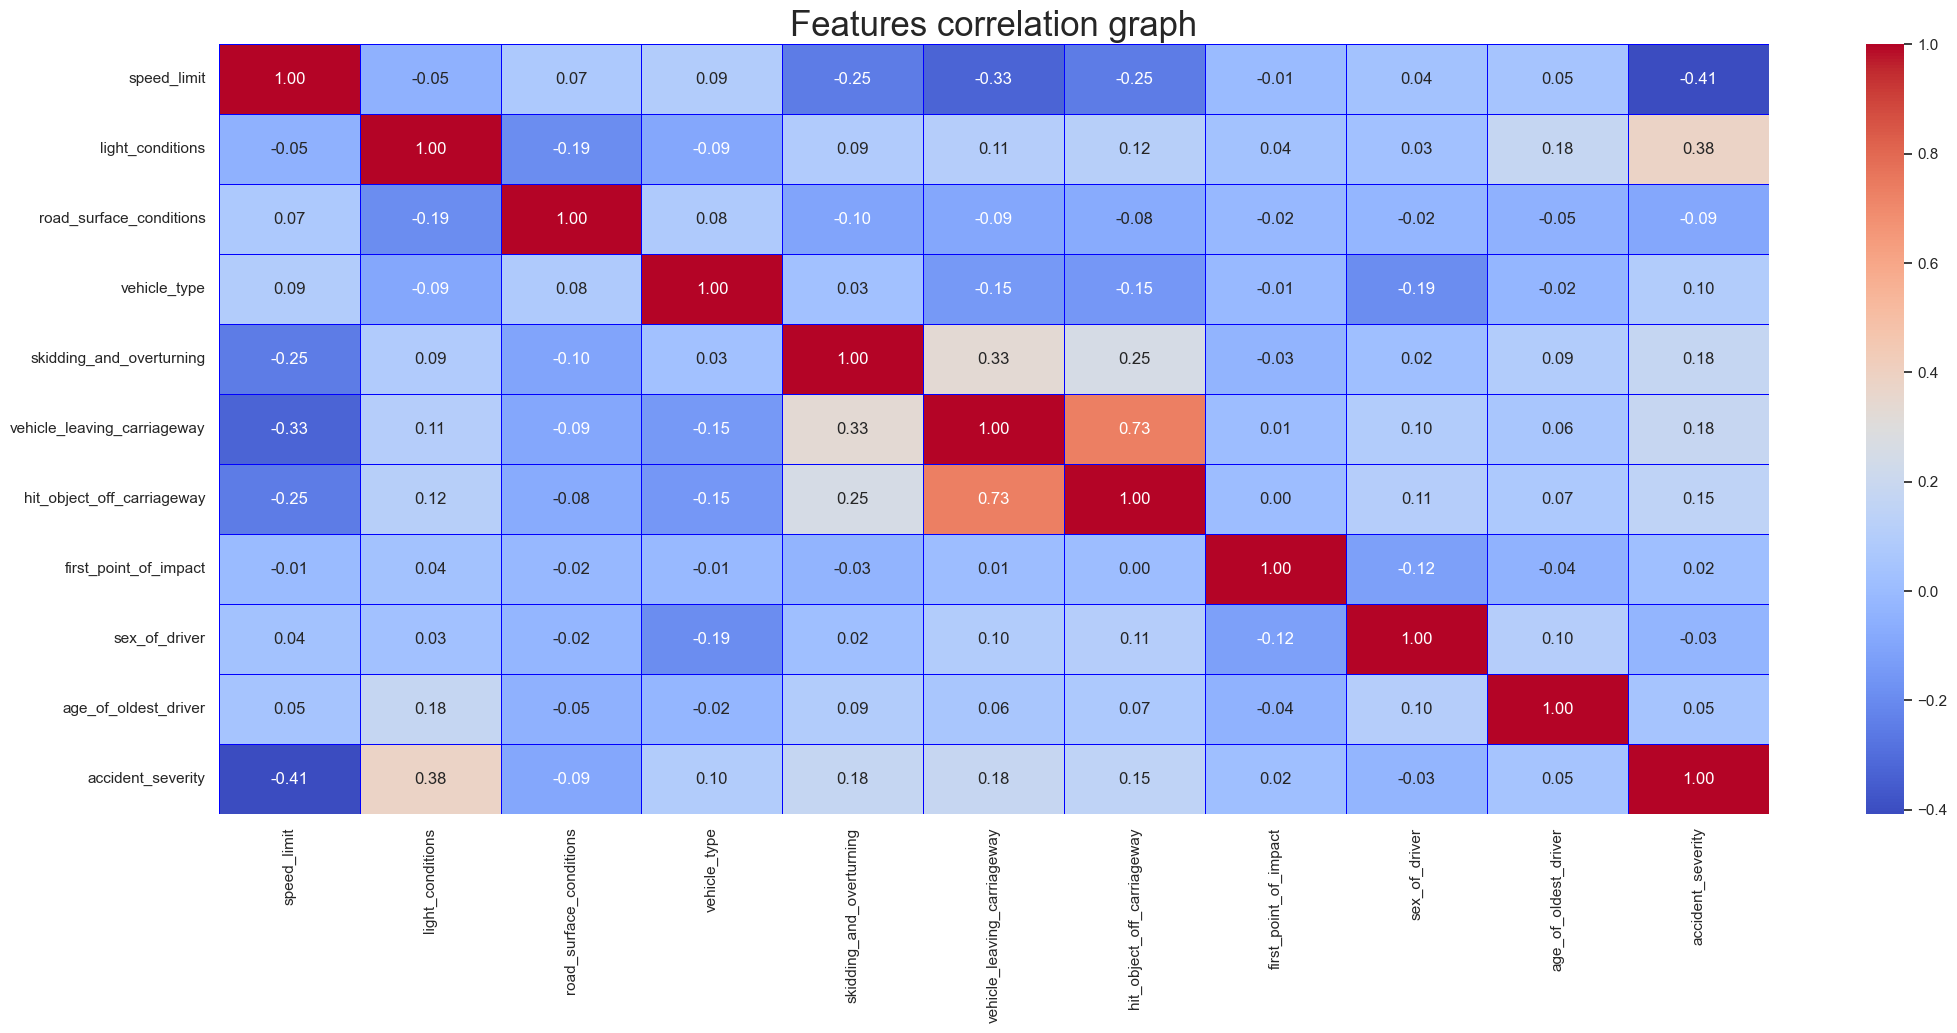

In [56]:
sns.heatmap(data_en.corr(), annot=True, linewidth=0.5, linecolor="blue", fmt= '.2f',cmap="coolwarm")
plt.title("Features correlation graph", fontsize= 25)
plt.show()

In [57]:
data_x = data_en.drop('accident_severity', axis=1)
data_y = data_en['accident_severity']
print(data_x.shape)

(18403, 10)


In [58]:
data_x.head(5)

,speed_limit,light_conditions,road_surface_conditions,vehicle_type,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver
1,1,0,0,3,1,0,0,0,1,72
4,1,1,0,3,1,1,1,0,0,29
6,1,0,1,3,1,1,1,0,1,30
7,3,1,0,3,1,1,1,0,1,47
8,4,1,0,1,1,1,1,0,1,47


In [59]:
# standardize data
sc = StandardScaler()
data_X = sc.fit_transform(data_x)
print(data_X.shape,data_y.shape)

(18403, 10) (18403,)


In [60]:
# split into training and testing
x_train,x_test, y_train,y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=42)
print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)

(14722, 10) (3681, 10) (14722,) (3681,)


In [61]:
data_en.accident_severity.value_counts()

2    7839
1    6413
0    4151
Name: accident_severity, dtype: int64

In [62]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


# Performing Oversampling

In [63]:

from imblearn.over_sampling import RandomOverSampler

data_X = data_en.drop('accident_severity', axis=1)
data_y = data_en['accident_severity']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(data_X, data_y)

# check the class distribution after oversampling
pd.Series(y_resampled).value_counts()


0    7839
2    7839
1    7839
Name: accident_severity, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(random_state=42),
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: {accuracy}')


DecisionTreeClassifier(random_state=42)

Decision Tree: 0.7876275510204082


RandomForestClassifier(random_state=42)

Random Forest: 0.7980442176870748


LogisticRegression(random_state=42)

Logistic Regression: 0.7045068027210885


KNeighborsClassifier()

K-Nearest Neighbors: 0.7527636054421769


GaussianNB()

Gaussian Naive Bayes: 0.6977040816326531


SVC(random_state=42)

Support Vector Machine: 0.6645408163265306


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Load data and split into training and testing sets
X = data_en.drop('accident_severity', axis=1)
y = data_en['accident_severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
nb_model = MultinomialNB()
svm_model = SVC(kernel='linear', random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Fit models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
nb_preds = nb_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

# Evaluate models
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))

print("Decision Tree Precision:", precision_score(y_test, dt_preds, average='weighted'))
print("Random Forest Precision:", precision_score(y_test, rf_preds, average='weighted'))
print("Naive Bayes Precision:", precision_score(y_test, nb_preds, average='weighted'))
print("SVM Precision:", precision_score(y_test, svm_preds, average='weighted'))
print("Gradient Boosting Precision:", precision_score(y_test, gb_preds, average='weighted'))

print("Decision Tree Recall:", recall_score(y_test, dt_preds, average='weighted'))
print("Random Forest Recall:", recall_score(y_test, rf_preds, average='weighted'))
print("Naive Bayes Recall:", recall_score(y_test, nb_preds, average='weighted'))
print("SVM Recall:", recall_score(y_test, svm_preds, average='weighted'))
print("Gradient Boosting Recall:", recall_score(y_test, gb_preds, average='weighted'))

print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, nb_preds))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_preds))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, gb_preds))


DecisionTreeClassifier(random_state=42)

RandomForestClassifier(random_state=42)

MultinomialNB()

SVC(kernel='linear', random_state=42)

GradientBoostingClassifier(random_state=42)

Decision Tree Accuracy: 0.7150230915512089
Random Forest Accuracy: 0.7400162999185004
Naive Bayes Accuracy: 0.675903287150231
SVM Accuracy: 0.689214887258897
Gradient Boosting Accuracy: 0.7845694104862809
Decision Tree Precision: 0.7178686443544975
Random Forest Precision: 0.7426649374185417
Naive Bayes Precision: 0.6722582394112191
SVM Precision: 0.711823897140308
Gradient Boosting Precision: 0.8106164787378416
Decision Tree Recall: 0.7150230915512089
Random Forest Recall: 0.7400162999185004
Naive Bayes Recall: 0.675903287150231
SVM Recall: 0.689214887258897
Gradient Boosting Recall: 0.7845694104862809
Decision Tree Confusion Matrix:
 [[ 560  160  100]
 [ 184  883  218]
 [ 140  247 1189]]
Random Forest Confusion Matrix:
 [[ 581  140   99]
 [ 185  907  193]
 [ 130  210 1236]]
Naive Bayes Confusion Matrix:
 [[ 404  126  290]
 [ 159  914  212]
 [ 105  301 1170]]
SVM Confusion Matrix:
 [[ 591  156   73]
 [ 219  944  122]
 [ 167  407 1002]]
Gradient Boosting Confusion Matrix:
 [[ 764   28 

In [66]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as XGBClassifier
from xgboost import XGBClassifier
import pandas as pd


# Split data into training and testing sets
X = data_en.drop('accident_severity', axis=1)
y = data_en['accident_severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
nb_model = MultinomialNB()
gnb_model = GaussianNB()
svm_model = SVC(kernel='linear', random_state=42)
lsvm_model = LinearSVC(random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
lr_model = LogisticRegression(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
ada_model = AdaBoostClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)


# Fit models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
gnb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
lsvm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Make predictions
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
nb_preds = nb_model.predict(X_test)
gnb_preds = gnb_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
lsvm_preds = lsvm_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
lr_preds = lr_model.predict(X_test)
gb_preds = gb_model.predict(X_test)
ada_preds = ada_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Evaluate models
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, gnb_preds))
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("Linear SVM Accuracy:", accuracy_score(y_test, lsvm_preds))
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_preds))
print("xgboost Accuracy:", accuracy_score(y_test, xgb_preds))

print("Decision Tree Precision:", precision_score(y_test, dt_preds, average='weighted'))
print("Random Forest Precision:", precision_score(y_test, rf_preds, average='weighted'))
print("Naive Bayes Precision:", precision_score(y_test, nb_preds, average='weighted'))
print("Gaussian Naive Bayes Precision:", precision_score(y_test, gnb_preds, average='weighted'))
print("SVM Precision:", precision_score(y_test, svm_preds, average='weighted'))
print("Linear SVM Precision:", precision_score(y_test,lsvm_preds, average='weighted'))
print("KNN Precision:", precision_score(y_test, knn_preds, average='weighted'))
print("Logistic Regression Precision:", precision_score(y_test, lr_preds, average='weighted'))                                             
print("Gradient Boosting Precision:", precision_score(y_test, gb_preds, average='weighted'))
print("AdaBoost Precision:", precision_score(y_test, ada_preds, average='weighted'))
print("Decision Tree Precision:", precision_score(y_test, dt_preds, average='weighted'))
print("Random Forest Precision:", precision_score(y_test, rf_preds, average='weighted'))
                                               
print("Decision Tree recall:", recall_score(y_test, dt_preds, average='weighted'))
print("Random Forest recall:", recall_score(y_test, rf_preds, average='weighted'))
print("Naive Bayes recall:", recall_score(y_test, nb_preds, average='weighted'))
print("Gaussian Naive Bayes recall:", recall_score(y_test, gnb_preds, average='weighted'))
print("SVM recall:", recall_score(y_test, svm_preds, average='weighted'))
print("Linear SVM recall:", recall_score(y_test,lsvm_preds, average='weighted'))
print("KNN recall:", recall_score(y_test, knn_preds, average='weighted'))
print("Logistic Regression recall:", recall_score(y_test, lr_preds, average='weighted'))                                             
print("Gradient Boosting recall:", recall_score(y_test, gb_preds, average='weighted'))
print("AdaBoost recall:", recall_score(y_test, ada_preds, average='weighted'))
print("Decision Tree recall:", recall_score(y_test, dt_preds, average='weighted'))
print("Random Forest recall:", recall_score(y_test, rf_preds, average='weighted'))

print("Decision Tree confusion_matrix:", confusion_matrix(y_test, dt_preds))
print("Random Forest confusion_matrix:", confusion_matrix(y_test, rf_preds))
print("Naive Bayes confusion_matrix:", confusion_matrix(y_test, nb_preds))
print("Gaussian Naive Bayes confusion_matrix:", confusion_matrix(y_test, gnb_preds))
print("SVM confusion_matrix:", confusion_matrix(y_test, svm_preds))
print("Linear SVM confusion_matrix:", confusion_matrix(y_test,lsvm_preds))
print("KNN confusion_matrix:", confusion_matrix(y_test, knn_preds))
print("Logistic Regression confusion_matrix:", confusion_matrix(y_test, lr_preds))                                             
print("Gradient Boosting confusion_matrix:", confusion_matrix(y_test, gb_preds))
print("AdaBoost confusion_matrix:", confusion_matrix(y_test, ada_preds))
print("Decision Tree confusion_matrix:", confusion_matrix(y_test, dt_preds))
print("Random Forest confusion_matrix:", confusion_matrix(y_test, rf_preds))

DecisionTreeClassifier(random_state=42)

RandomForestClassifier(random_state=42)

MultinomialNB()

GaussianNB()

SVC(kernel='linear', random_state=42)

LinearSVC(random_state=42)

KNeighborsClassifier()

LogisticRegression(random_state=42)

GradientBoostingClassifier(random_state=42)

AdaBoostClassifier(random_state=42)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Decision Tree Accuracy: 0.7150230915512089
Random Forest Accuracy: 0.7400162999185004
Naive Bayes Accuracy: 0.675903287150231
Gaussian Naive Bayes Accuracy: 0.6938331975006792
SVM Accuracy: 0.689214887258897
Linear SVM Accuracy: 0.6916598750339582
KNN Accuracy: 0.7166530834012497
Logistic Regression Accuracy: 0.7307796794349362
Gradient Boosting Accuracy: 0.7845694104862809
AdaBoost Accuracy: 0.7582178755772888
xgboost Accuracy: 0.7775061124694377
Decision Tree Precision: 0.7178686443544975
Random Forest Precision: 0.7426649374185417
Naive Bayes Precision: 0.6722582394112191
Gaussian Naive Bayes Precision: 0.710599139240503
SVM Precision: 0.711823897140308
Linear SVM Precision: 0.7082598053171862
KNN Precision: 0.7202027830136705
Logistic Regression Precision: 0.7366194177963731
Gradient Boosting Precision: 0.8106164787378416
AdaBoost Precision: 0.7667530419967499
Decision Tree Precision: 0.7178686443544975
Random Forest Precision: 0.7426649374185417
Decision Tree recall: 0.71502309155

# Hyper Parameter Tuning  Random Forest 

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rfc = RandomForestClassifier()

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Print the best hyperparameters and corresponding mean cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]})

Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best score: 0.8188975664686456


# Neural Network- Tensor Flow

In [69]:
pip install tensorflow==1.2.0 --ignore-installed

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==1.2.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==1.2.0


In [70]:
pip install numpy --upgrade

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.24.2-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\users\\sr5190a\\appdata\\roaming\\python\\python39\\site-packages\\~umpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Check the permissions.



In [76]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 272.8/272.8 MB 1.4 MB/s eta 0:00:00
     --------------------------------------- 14.7/14.7 MB 27.3 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 19.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 1.7/1.7 MB 22.1 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 10.5 MB/s eta 0:00:00
     -----------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.


In [77]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2)

# Evaluate the model on the testing data
_, acc = model.evaluate(X_test, y_test)
print("Accuracy:", acc)

# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred = [np.argmax(pred) for pred in y_pred]

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
# Classify target variables prediction
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/150
369/369 [==============================] - 3s 4ms/step - loss: 0.8853 - accuracy: 0.6365 - val_loss: 0.7381 - val_accuracy: 0.7175
Epoch 2/150
369/369 [==============================] - 1s 3ms/step - loss: 0.7566 - accuracy: 0.6958 - val_loss: 0.7503 - val_accuracy: 0.7080
Epoch 3/150
369/369 [==============================] - 1s 3ms/step - loss: 0.7186 - accuracy: 0.7290 - val_loss: 0.6729 - val_accuracy: 0.7576
Epoch 4/150
369/369 [==============================] - 1s 3ms/step - loss: 0.6992 - accuracy: 0.7423 - val_loss: 0.6651 - val_accuracy: 0.7626
Epoch 5/150
369/369 [==============================] - 1s 3ms/step - loss: 0.6872 - accuracy: 0.7536 - val_loss: 0.6616 - val_accuracy: 0.7562
Epoch 6/150
369/369 [==============================] - 1s 3ms/step - loss: 0.6753 - accuracy: 0.7545 - val_loss: 0.6581 - val_accuracy: 0.7718
Epoch 7/150
369/369 [==============================] - 1s 3ms/step - loss: 0.6741 - accuracy: 0.7557 - val_loss: 0.6567 - val_accuracy: 0.7701

# ROC Curve

DecisionTreeClassifier(random_state=42)

RandomForestClassifier(random_state=42)

SVC(probability=True, random_state=42)

SVC(kernel='linear', probability=True, random_state=42)

KNeighborsClassifier()

LogisticRegression(random_state=42)

GradientBoostingClassifier(random_state=42)

AdaBoostClassifier(random_state=42)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

MLPClassifier(max_iter=500, random_state=42)

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

Text(0.5, 0, 'False Positive Rate (FPR)')

Text(0, 0.5, 'True Positive Rate (TPR)')

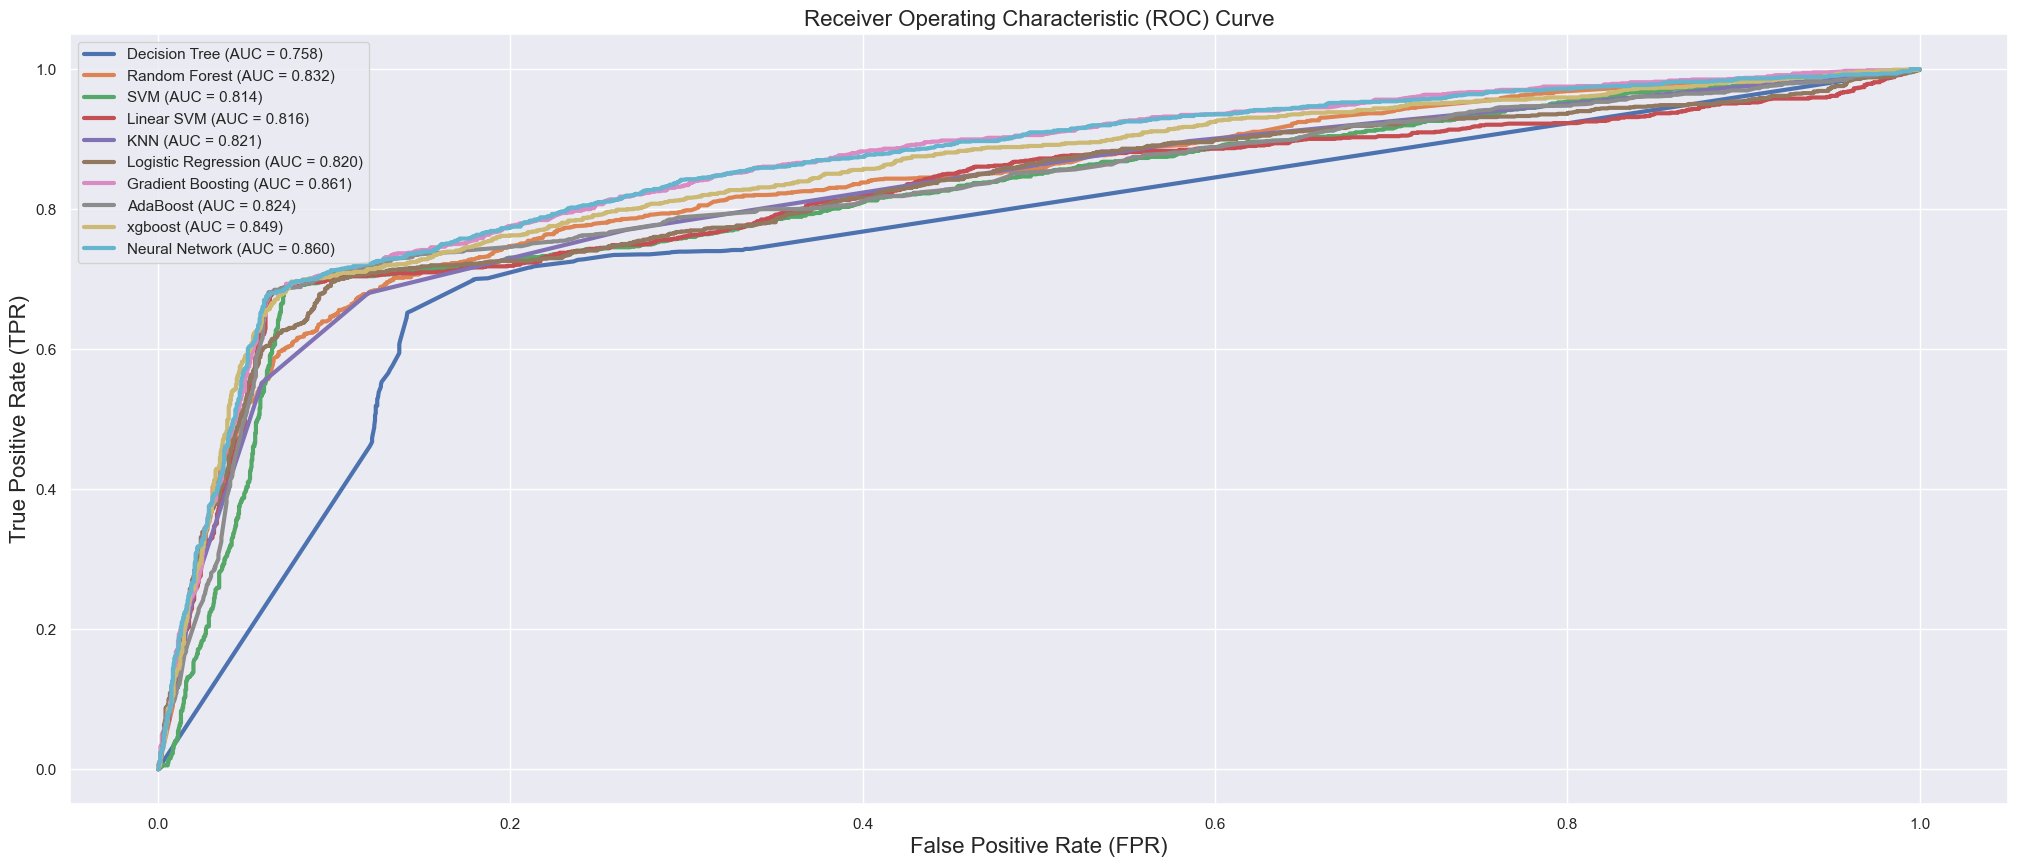

In [78]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(kernel='rbf', random_state=42, probability=True)),
    ('Linear SVM', SVC(kernel='linear', random_state=42, probability=True)),
    ('KNN', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('xgboost', XGBClassifier(random_state=42)),
    ('Neural Network', MLPClassifier(random_state=42, max_iter=500)),
]

# Train and predict on each model, and get the predicted probabilities of the positive class
for name, model in models:
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)
    
    # Compute the FPR and TPR at different thresholds, and compute the AUC score
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
    auc_score = auc(fpr, tpr)
    
    # Plot the ROC curve for each model
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})',linewidth=3)

# Set the title and axis labels
plt.title('Receiver Operating Characteristic (ROC) Curve',fontsize=16)
plt.xlabel('False Positive Rate (FPR)',fontsize=16)
plt.ylabel('True Positive Rate (TPR)',fontsize=16)

# Show the legend and plot
plt.legend()
plt.show()
